<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pandas-Dataframes" data-toc-modified-id="Pandas-Dataframes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pandas Dataframes</a></span><ul class="toc-item"><li><span><a href="#Filtering-Dataframes-(50/50)" data-toc-modified-id="Filtering-Dataframes-(50/50)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Filtering Dataframes (50/50)</a></span></li><li><span><a href="#Plotting-Dataframes-(10/10)" data-toc-modified-id="Plotting-Dataframes-(10/10)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting Dataframes (10/10)</a></span></li><li><span><a href="#Dataframe-Statistics-(40/40)" data-toc-modified-id="Dataframe-Statistics-(40/40)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dataframe Statistics (40/40)</a></span></li></ul></li></ul></div>

# Homework 3 

- You should consider any comments which start w/ hashtags (#) as an instruction or question for you to respond to.

- All code should be executable from top-to-bottom. It is acceptable if a later code box depends on an earlier code box (e.g., if a function is defined early that is later utilized). 

- When writing programs which require other files we will always put those files in the same directory as the python notebook that you are writing. 

<b>If you are using google colab you should save this notebook and any associated textfiles to their own folder on your google drive. Then you will need to adapt the following commands so that the notebook runs from the location of that folder.</b>


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# Colab command to navigate to the folder holding the homework,
# CHANGE FOR YOUR SPECIFIC FOLDER LOCATION IN GOOGLE DRIVE
# Note: if there are spaces in the path, you need to preceed them with a backslash '\'
#%cd /content/drive/My\ Drive/CHE597/Homework/HW-1

## Pandas Dataframes

### Filtering Dataframes (50/50)
The following exercises involve initializing and filtering pandas dataframes

In [3]:
# 1: import numpy, pandas, and matplotlib.pyplot with the namespaces np, pd, and plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# 2: Import the csv data from reaction_data.txt using column 0 as the row index and assign it to the pointer df
df = pd.read_csv('reaction_data.txt', index_col=0)

In [5]:
# 3: Determine how many rows contain missing data (anywhere in the row)
#    HINT: Remember that you can chain methods together
#    HINT: the .any(axis=0/1) method can be used to return a series with True/False if "any" values are True/False
#          along a given colummn or row, respectively. You don't have to use this, but I think it is useful.

sum(df.isnull().values.ravel())
#sum([True for idx,row in df.iterrows() if any(row.isnull())])

42

In [6]:
# 4: Use pandas methods/functions to determine which column(s) in df contain missing values
#df.loc[:, df.isnull().any()].columns
df.isnull().sum()
#df.isnull().any(axis=1).sum()


date         0
type         0
R1(M)        0
R2(M)        0
Vol(L)       0
solvent      0
T(K)         0
yield(%)    42
NMR          0
GC/MS        0
IR           0
UV/VIS       0
dtype: int64

In [7]:
# 5: Sort df inplace by reaction type, temperature, and yield (in that order) so that all of 
#    the reactions of the same type are together and sorted by temperature and yield (in ascending order). 

#dfTemp = df.groupby('T(K)')
dfSort = (df.sort_values(['type', 'T(K)', 'yield(%)'], ascending=[True, True, True]))
print(dfSort)
#print('temps {}'.format(df.sort_values(['type', 'T(K)', 'yield(%)'], ascending=[True, True, True])))

             date           type  R1(M)  R2(M)  Vol(L)       solvent   T(K)  \
exp_id                                                                        
7        2-2-2020    Diels-Alder    1.1    0.4     0.1    chloroform  260.0   
299     2-25-2020    Diels-Alder    0.0    1.5     5.0        ethers  260.0   
121     2-10-2020    Diels-Alder    0.4    0.0     0.2  acetonitrile  278.3   
132     2-11-2020    Diels-Alder    1.5    0.3     0.5        ethers  298.0   
284     2-23-2020    Diels-Alder    0.7    0.9     0.2    chloroform  298.0   
58       2-5-2020    Diels-Alder    0.5    0.0     0.5       xylenes  298.0   
197     2-14-2020    Diels-Alder    0.5    1.5     0.2  acetonitrile  298.0   
224     2-17-2020    Diels-Alder    0.1    0.2     0.1    chloroform  298.0   
129     2-11-2020    Diels-Alder    1.3    0.1     0.5  acetonitrile  298.0   
235     2-18-2020    Diels-Alder    0.4    0.8     0.1  acetonitrile  298.0   
232     2-18-2020    Diels-Alder    0.9    0.4     0

In [8]:
# 6: Replace the missing yield(%) values with the yield value of another reaction of the same type, 
#    at the nearest available temperature, and with the highest yield.
#    Hint: can be done in a single line if previous problem was done correctly
dfSort.interpolate(method='linear').ffill()

date           type  R1(M)  R2(M)  Vol(L)       solvent   T(K)  \
exp_id                                                                        
7        2-2-2020    Diels-Alder    1.1    0.4     0.1    chloroform  260.0   
299     2-25-2020    Diels-Alder    0.0    1.5     5.0        ethers  260.0   
121     2-10-2020    Diels-Alder    0.4    0.0     0.2  acetonitrile  278.3   
132     2-11-2020    Diels-Alder    1.5    0.3     0.5        ethers  298.0   
284     2-23-2020    Diels-Alder    0.7    0.9     0.2    chloroform  298.0   
58       2-5-2020    Diels-Alder    0.5    0.0     0.5       xylenes  298.0   
197     2-14-2020    Diels-Alder    0.5    1.5     0.2  acetonitrile  298.0   
224     2-17-2020    Diels-Alder    0.1    0.2     0.1    chloroform  298.0   
129     2-11-2020    Diels-Alder    1.3    0.1     0.5  acetonitrile  298.0   
235     2-18-2020    Diels-Alder    0.4    0.8     0.1  acetonitrile  298.0   
232     2-18-2020    Diels-Alder    0.9    0.4     0.2        ethers  298.0   
94       2-7-2020    Diels-Alder    0.9    1.2    10.0  acetonitrile  300.0   
90       2-7-2020    Diels-Alder    0.3    0.1     1.0       ethanol  300.0   
79       2-6-2020    Diels-Alder    0.5    1.1     0.2       xylenes  300.0   
229     2-17-2020    Diels-Alder    0.5    0.3     0.2           THF  300.0   
37       2-4-2020    Diels-Alder    1.5    0.6    10.0       ethanol  300.0   
263     2-20-2020    Diels-Alder    0.1    1.1     0.1        ethers  300.0   
185     2-14-2020    Diels-Alder    0.8    0.0     0.1  acetonitrile  310.0   
190     2-14-2020    Diels-Alder    1.4    0.2     0.1       xylenes  310.0   
262     2-20-2020    Diels-Alder    0.5    1.4     0.2       ethanol  310.0   
252     2-19-2020    Diels-Alder    1.2    0.4     0.2    chloroform  320.0   
72       2-6-2020    Diels-Alder    1.1    0.2     5.0       xylenes  320.0   
170     2-13-2020    Diels-Alder    1.5    1.0     0.2    chloroform  320.0   
215     2-17-2020    Diels-Alder    0.9    0.6     0.5           THF  320.0   
181     2-13-2020    Diels-Alder    0.4    1.5     0.2       ethanol  320.0   
251     2-19-2020  FC-alkylation    0.1    0.8     0.5        ethers  260.0   
311     2-26-2020  FC-alkylation    0.3    1.5     0.2       xylenes  260.0   
176     2-13-2020  FC-alkylation    0.6    0.3     0.5        ethers  260.0   
267     2-21-2020  FC-alkylation    1.0    0.0     0.1    chloroform  260.0   
253     2-20-2020  FC-alkylation    0.6    0.9    10.0       xylenes  278.3   
...           ...            ...    ...    ...     ...           ...    ...   
329     2-26-2020     tosylation    0.6    0.4     5.0       xylenes  320.0   
33       2-4-2020     tosylation    0.1    1.4     5.0       ethanol  320.0   
104      2-9-2020     tosylation    0.5    0.5     0.1    chloroform  320.0   
199     2-14-2020         wittig    0.7    0.0     1.0           THF  260.0   
41       2-4-2020         wittig    1.4    0.6     0.2        ethers  260.0   
85       2-7-2020         wittig    0.7    0.2    10.0    chloroform  260.0   
319     2-26-2020         wittig    0.3    0.5     0.1        ethers  278.3   
324     2-26-2020         wittig    0.0    1.3     0.5       ethanol  278.3   
71       2-6-2020         wittig    0.0    1.0     0.2           THF  298.0   
114     2-10-2020         wittig    0.1    1.1     0.2           THF  298.0   
348     2-27-2020         wittig    1.4    0.2     0.2           THF  298.0   
4        2-2-2020         wittig    0.4    0.2     0.2       ethanol  298.0   
245     2-19-2020         wittig    0.0    0.7     0.2        ethers  298.0   
226     2-17-2020         wittig    0.6    0.6     0.2       ethanol  298.0   
115     2-10-2020         wittig    1.0    1.1     0.2  acetonitrile  298.0   
36       2-4-2020         wittig    0.4    0.6    10.0    chloroform  298.0   
87       2-7-2020         wittig    1.5    0.0     0.2           THF  298.0   
347     2-27-2020         wittig    1.0    1.1     0.1       xy

In [9]:
# 7: Create a series with labels corresponding to each reaction type and values
#    corresponding to the number of times each reaction was performed. 
#vals = { _:len(df["type"]) for _ in df["type"].unique() }
#print(vals)

#df.groupby('type').sum()

#df.count()
#df.set_index

#df.groupby('type').count()
#dfSort.sort_index
amount =df['type'].value_counts()
print(amount)

dehydrogenation    29
wittig             27
SN2-CN             27
tosylation         26
SN2-OH             26
Diels-Alder        25
hydroboration      25
FC-alkylation      25
Hoffmann-E         24
claisen            24
SN1-I              24
cross-coupling     22
grignard           21
epoxidation        21
M-addition         19
Name: type, dtype: int64


<b>Answer the following based on the results of the above cell (double-click here to add your answers):</b>
- Which reaction type was performed the most? 
* Dehydrogentation
- Which reaction type was performed the least?
* M-addition

### Plotting Dataframes (10/10)

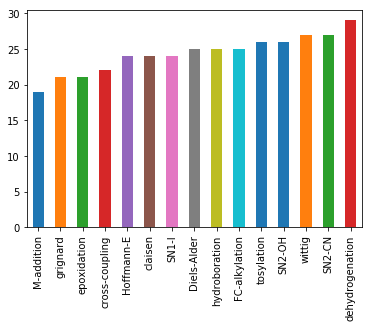

In [10]:
# 8: Make a bar plot with each reaction type along x and the number of number of times it was performed along y, 
#    with the bars in ascending order. 
amount.sort_values(ascending=True).plot.bar(x='reactions',y='amount')

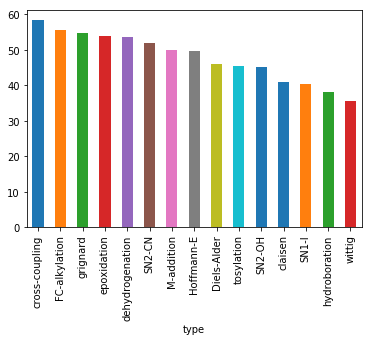

In [11]:
# 9: Make a bar plot with the mean yield for each reaction type.
#    Make the plot so that the bars are in descending order

mean = df.groupby('type')['yield(%)'].mean()

mean.sort_values(ascending = False).plot.bar()
#plot = mean.plot.bar()
#mean.plot.bar()

<b>Answer the following based on the result of the above cell (double-click here to add your answers):</b>
- Which reaction type had the highest average yield? 
*cross-coupling
- Which reaction type had the lowest average yield? 
*wittig

### Dataframe Statistics (40/40)
The following problems will use the data in `Hvap.txt`. It compares reference values for the enthalpy of vaporization of several small molecules at various temperatures. The `Hvap_ref` column corresponds to the trusted value, the predictions of three other methods (`Method_1`,`Method_2`,and `Method_3`) are also included. Predictions for some of the methods will be missing for certain molecules/temperatures. 

In [12]:
# 10: Import the csv data from Hvap.txt using column 0 as the row index and assign it to the pointer hvap
hvap = pd.read_csv('Hvap.txt', index_col=0)
print(hvap)

                            Name    T(K)  Hvap_ref(kJ/mol)  Method_1(kJ/mol)  \
0                     chloroform  298.15             31.28             28.42   
1        dichloro(fluoro)methane  282.05             24.95               NaN   
2                 dibromomethane  293.15             37.67             29.05   
3                 dibromomethane  298.15             37.45               NaN   
4                dichloromethane  293.15             29.50             27.02   
5                dichloromethane  298.15             28.82               NaN   
6                       methanal  253.15             23.10             24.85   
7                       methanal  253.65             23.08             24.79   
8                 methanoic_acid  293.15             19.82               NaN   
9                 methanoic_acid  298.15             19.90             65.46   
10                   methanamide  298.15             60.57             62.15   
11                  nitromethane  293.15

If you investigate your dataframe you will see that hvap has reference data for the heat of vaporization of several compounds at various temperatures. It also supplies a comparison of the heat of vaporization predictions for three methods ("Method_1", "Method_2", and "Method_3"). However, some of the methods are only available for a subset of the references (i.e., there are missing values). 

In [13]:
# 11: Use slicing to find the rows in the dataframe where method_1, method_2, and method_3 are all present and print them out.
hvap.dropna()

Name    T(K)  Hvap_ref(kJ/mol)  Method_1(kJ/mol)  \
14                  methanol  298.15             37.43             39.62   
26        1,1-dichloroethane  298.15             30.62             31.73   
41                   ethanol  298.15             42.32             44.62   
45   methyldisulfanylmethane  298.15             38.32             32.75   
101               pyrimidine  298.15             49.81             50.47   
103                    furan  298.15             27.46             30.33   
105                thiophene  298.15             34.65             32.72   
115            ethyl_acetate  298.15             35.59             45.81   
128                 pyridine  298.15             40.15             41.27   
153      1,3-difluorobenzene  298.15             36.58             33.78   
157            fluorobenzene  298.15             34.58             33.87   
159             nitrobenzene  298.15             55.01             70.79   
169         4-methylpyridine  298.15             44.81             46.06   
172            (E)-hex-2-ene  293.15             32.20             32.14   
190                  toluene  298.15             37.99             37.39   
192           methoxybenzene  298.15             45.00             48.89   
210      1,2-dimethylbenzene  298.15             43.43             42.77   
226   1,2,4-trimethylbenzene  298.15             47.57             47.04   

     Method_2(kJ/mol)  Method_3(kJ/mol)  
14              36.44             36.86  
26              28.29             30.59  
41              42.32             42.59  
45              37.52             35.35  
101             49.33             51.09  
103             29.81             23.60  
105             39.15             35.40  
115             41.91             35.10  
128             41.34             41.97  
153             34.03             42.76  
157             34.37             37.03  
159             55.40             54.73  
169             46.40             44.60  
172             33.62             31.88  
190             40.02             36.19  
192             47.53             41.63  
210             46.45             41.00  
226             51.45             45.19

In [25]:
# 12: Calculate the mean absolute error ((MAE, <|method-ref|>) and mean signed error (MSE, <method-ref>)
#     Use all of the non-NaN values for each method and print the result.
#hvap['<'] = abs(hvap['Hvap_ref(kJ/mol)'])

#Absolute value for each method
hvapRefAbs = abs(hvap['Hvap_ref(kJ/mol)'])
hvapM1Abs = abs(hvap['Method_1(kJ/mol)'])
hvapM2Abs = abs(hvap['Method_2(kJ/mol)'])
hvapM3Abs = abs(hvap['Method_3(kJ/mol)'])

mae1 = abs(hvapRefAbs - hvapM1Abs)
mae1T = mae1.sum() / 197
#print(mae1)
print('Mean Absolute Error Method 1:', mae1T)


mae2 = abs(hvapRefAbs - hvapM2Abs)
mae2T = mae2.sum() / 199
print('Mean Absolute Error Method 2:', mae2T)

mae3 = abs(hvapRefAbs - hvapM3Abs)
mae3T = mae3.sum() / 60
print('Mean Absolute Error Method 3:', mae3T)

#Mean Signed Error

hvapRefs = hvap['Hvap_ref(kJ/mol)']
hvapM1s = hvap['Method_1(kJ/mol)']
hvapM2s = hvap['Method_2(kJ/mol)']
hvapM3s = hvap['Method_3(kJ/mol)']

mae1s = hvapRefs - hvapM1s
mae1Sum = mae1s.sum() / 197
#print(mae1)
print('Mean Signed Error Method 1:', mae1Sum)


mae2s = hvapRefs - hvapM2s
mae2Sum = mae2s.sum() / 199
print('Mean Signed Error Method 2:', mae2Sum)

mae3s = hvapRefs - hvapM3s
mae3Sum = mae3s.sum() / 60
print('Mean Signed Error Method 3:', mae3Sum)

#length of each method
#df.groupby('type')['yield(%)'].mean()
#amount =df['type'].value_counts()
#hvapRefAbsLength = hvap['Hvap_ref(kJ/mol)'].value_counts
#hvapM1AbsLength = hvap['Method_1(kJ/mol)'].value_counts
#hvapM2AbsLength = len(hvap['Method_2(kJ/mol)'])
#hvapM3AbsLength = len(hvap['Method_3(kJ/mol)'])

#confirm length
#print('Ref length:', hvapRefAbsLength)
#print('M1 length:', hvapM1AbsLength)
#print('M2 length:', hvapM2AbsLength)
#print('M3 length:', hvapM3AbsLength)



#Hvap_ref(kJ/mol)
#Method_1(kJ/mol)
#Method_2(kJ/mol)
#Method_3(kJ/mol)
print(hvapM1s.count())
print(hvapM2s.count())
print(hvapM3s.count())


Mean Absolute Error Method 1: 7.220609137055837
Mean Absolute Error Method 2: 4.410904522613064
Mean Absolute Error Method 3: 4.482333333333334
Mean Signed Error Method 1: -5.958680203045686
Mean Signed Error Method 2: -3.226884422110553
Mean Signed Error Method 3: -2.811666666666667
197
199
60


In [15]:
# 13: On the molecules and temperatures where all three methods have values
#     calculate the MAE and MSE for each method and print the result
#     Note: in the previous problem you calculated MAE and MSE for the values where each method had non-NaN;
#           in this problem you will calculate these quantities only for the samples where *all* methods have non-NaN.
corr = hvap.corr()
corr

T(K)  Hvap_ref(kJ/mol)  Method_1(kJ/mol)  \
T(K)              1.000000          0.369964          0.403203   
Hvap_ref(kJ/mol)  0.369964          1.000000          0.883579   
Method_1(kJ/mol)  0.403203          0.883579          1.000000   
Method_2(kJ/mol)  0.319202          0.928278          0.933185   
Method_3(kJ/mol)  0.081730          0.803469          0.859622   

                  Method_2(kJ/mol)  Method_3(kJ/mol)  
T(K)                      0.319202          0.081730  
Hvap_ref(kJ/mol)          0.928278          0.803469  
Method_1(kJ/mol)          0.933185          0.859622  
Method_2(kJ/mol)          1.000000          0.858256  
Method_3(kJ/mol)          0.858256          1.000000

The MAE is a measure of average error, and the MSE is a measure of the systematic bias.

<b>Answer the following based on the results of the above cells (double-click here to add your answers):</b>
- According to the analysis of all of the data, do the methods typically over or underpredict the true value? 

</b> Overpredict </b>
- According to the analysis of samples where all methods were used, which method has the highest MAE? 


</b>  Method 1 has the highest MAE, almost double the other 2 methods</b>
- In one or two sentences tell me why it is difficult to determine which method is "best". 

</b> One reason it is difficult to determine the best is because method 3 has so few data points. Method 3 is very close to method 2's MAE, also Method 3 has the best MSE. 

Additionally, it depends whats more important for your project, accuracy, precision, time, cost, complexicity, learning curve, etc. We are not correlating all these other variables. Therefore we cannot say which method is "best" based on this data. This is more like a good starting point to guide us in the right direction. </b>

Method_2(kJ/mol)    0.933185
Hvap_ref(kJ/mol)    0.883579
Method_3(kJ/mol)    0.859622
T(K)                0.403203
Name: Method_1(kJ/mol), dtype: float64
Method_1(kJ/mol)    0.933185
Hvap_ref(kJ/mol)    0.928278
Method_3(kJ/mol)    0.858256
T(K)                0.319202
Name: Method_2(kJ/mol), dtype: float64
Method_1(kJ/mol)    0.859622
Method_2(kJ/mol)    0.858256
Hvap_ref(kJ/mol)    0.803469
T(K)                0.081730
Name: Method_3(kJ/mol), dtype: float64
Method_2(kJ/mol)    0.928278
Method_1(kJ/mol)    0.883579
Method_3(kJ/mol)    0.803469
T(K)                0.369964
Name: Hvap_ref(kJ/mol), dtype: float64


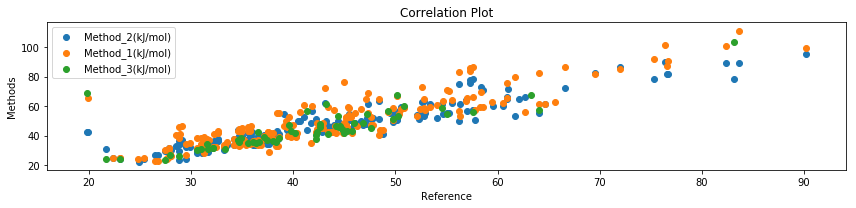

In [16]:
# 14: Make a parity/correlation plot (a scatter plot with reference values on x and each method's predictions on y).
#     Put all three datasets on one plot (use all data, not just the compounds where all methods were measured for each)
#     Include a legend, and label the axes

corr = hvap.corr()
corr
#corr.style.background_gradient(cmap='PRGn').set_precision(2)



M1_Cor =corr['Method_1(kJ/mol)'].abs().nlargest().index
print(corr['Method_1(kJ/mol)'] [M1_Cor[1:]])

M2_Cor =corr['Method_2(kJ/mol)'].abs().nlargest().index
print(corr['Method_2(kJ/mol)'] [M2_Cor[1:]])

M3_Cor =corr['Method_3(kJ/mol)'].abs().nlargest().index
print(corr['Method_3(kJ/mol)'] [M3_Cor[1:]])

Mr_Cor =corr['Hvap_ref(kJ/mol)'].abs().nlargest().index
print(corr['Hvap_ref(kJ/mol)'] [Mr_Cor[1:]])


#plt.figure(figsize=(8,8))
#plt.matshow(corr,fignum=0) # makes a new fig by default, 0 adds to current
#plt.colorbar() # add colorbar
#plt.title('Correlation Matrix', fontsize=16)
#plt.show()

plt.figure(figsize=(12,3))
for count_i,i in enumerate(Mr_Cor[1:-1]):
    #ax = plt.subplot(1,5,count_i+1)
    plt.scatter(hvap["Hvap_ref(kJ/mol)"],hvap[i])
    #plt.title("r={:4.3f}".format(corr.loc['Hvap_ref(kJ/mol)'][i]))
    plt.title('Correlation Plot')
    plt.xlabel("Reference")
    plt.ylabel('Methods')
plt.tight_layout()
plt.legend()
plt.show()


#plt.scatter(hvap.iloc[:,2],hvap.iloc[:,3],marker='o')
#plt.xlabel('Reference Values')
#plt.ylabel('Method Prediction')
#plt.legend()
#plt.show()

#plt.scatter(hvap.iloc[:,2],hvap.iloc[:,4],marker='o')
#plt.xlabel('Reference Values')
#plt.ylabel('Method Prediction')
#plt.legend()
#plt.show()

#plt.scatter(hvap.iloc[:,2],hvap.iloc[:,5],marker='o')
#plt.xlabel('Reference Values')
#plt.ylabel('Method Prediction')
#plt.legend()
#plt.show()


#plt.scatter(hvap.iloc[:,2],hvap.iloc[:,3],marker='o')
#plt.scatter(hvap.iloc[:,2],hvap.iloc[:,4],marker='o')
#plt.scatter(hvap.iloc[:,2],hvap.iloc[:,5],marker='o')
#plt.xlabel('Reference Values')
#plt.ylabel('Method Prediction')
#plt.legend()
#plt.show()



In [35]:
# 15: Inspecting the plot you will see a couple clear outliers at low Hvap_ref. 
#     Print out the five data points with the largest absolute error for each method




<b>Answer the following based on the results of the above cells (double-click here to add your answers):</b>
- Which compound exhibits the highest error in all methods?

</b> Method 1 </b>
- Compare the list of high error compounds for methods 1 and 2 with those of method 3. In one or two sentences, tell me why it might be difficult to accurately judge the true performance of method 3. 



Hvap_ref(kJ/mol)    0.894111
Method_2(kJ/mol)    0.886097
Method_3(kJ/mol)    0.829881
T(K)                0.228568
Name: Method_1(kJ/mol), dtype: float64
Hvap_ref(kJ/mol)    0.949976
Method_1(kJ/mol)    0.886097
Method_3(kJ/mol)    0.852655
T(K)                0.240159
Name: Method_2(kJ/mol), dtype: float64
Hvap_ref(kJ/mol)    0.945351
Method_2(kJ/mol)    0.852655
Method_1(kJ/mol)    0.829881
T(K)                0.251375
Name: Method_3(kJ/mol), dtype: float64
Method_2(kJ/mol)    0.949976
Method_3(kJ/mol)    0.945351
Method_1(kJ/mol)    0.894111
T(K)                0.262511
Name: Hvap_ref(kJ/mol), dtype: float64


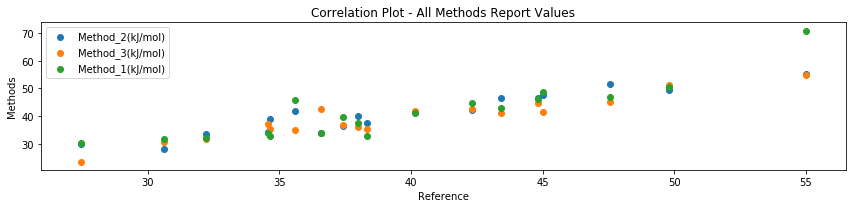

In [18]:
# 16: Make a correlation/parity plot that for the samples where all methods report values. 
#     Put all three datasets on one plot
#     Include a legend, and label the axes
all = hvap.dropna()
#print(all)

corrAll = all.corr()
corrAll

M1_CorAll =corrAll['Method_1(kJ/mol)'].abs().nlargest().index
print(corrAll['Method_1(kJ/mol)'] [M1_CorAll[1:]])

M2_CorAll =corrAll['Method_2(kJ/mol)'].abs().nlargest().index
print(corrAll['Method_2(kJ/mol)'] [M2_CorAll[1:]])

M3_CorAll =corrAll['Method_3(kJ/mol)'].abs().nlargest().index
print(corrAll['Method_3(kJ/mol)'] [M3_CorAll[1:]])

Mr_CorAll =corrAll['Hvap_ref(kJ/mol)'].abs().nlargest().index
print(corrAll['Hvap_ref(kJ/mol)'] [Mr_CorAll[1:]])

plt.figure(figsize=(12,3))
for count_i,i in enumerate(Mr_CorAll[1:-1]):
    #ax = plt.subplot(1,5,count_i+1)
    plt.scatter(all["Hvap_ref(kJ/mol)"],all[i])
    #plt.title("r={:4.3f}".format(corr.loc['Hvap_ref(kJ/mol)'][i]))
    plt.title('Correlation Plot - All Methods Report Values')
    plt.xlabel("Reference")
    plt.ylabel('Methods')
plt.tight_layout()
plt.legend()
plt.show()